In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import graphviz
from sklearn import ensemble , preprocessing , metrics , svm , tree , linear_model
from sklearn.neural_network import MLPClassifier
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation ,Dropout
from keras.optimizers import RMSprop ,Adam

## load data and check data

In [58]:
datacust = pd.read_csv ('D:\\bigdata\\training_set\\train_cust_info.csv')
datatpye = pd.read_csv ('D:\\bigdata\\training_set\\train_tpy_info.csv')
databuy = pd.read_csv ('D:\\bigdata\\training_set\\train_buy_info.csv')

In [59]:
databuy.head()

,CUST_ID,BUY_TYPE,AGE,SEX,HEIGHT,WEIGHT,OCCUPATION,CHILD_NUM,BUY_MONTH,BUY_YEAR,CITY_CODE,BUDGET,MARRIAGE
0,2903965,a,d,a,0.290444,-0.069464,q37,0,9,T,m,-0.097277,b
1,2815518,a,k,a,NaN,NaN,i37,0,1,T,u,0.527346,b
2,526983,d,j,a,0.172307,-0.162807,i37,2,10,T,g,-0.236314,f
3,2615375,e,f,b,0.526718,0.023878,r37,0,5,T,n,-0.231325,b
4,1867789,f,h,a,-0.152571,-0.396164,r32,0,8,T,k,-0.238327,b


In [60]:
datatpye.head()

,CUST_ID,BUY_TPY1_NUM_CLASS,BUY_TPY2_NUM_CLASS,BUY_TPY3_NUM_CLASS,BUY_TPY4_NUM_CLASS,BUY_TPY5_NUM_CLASS,BUY_TPY6_NUM_CLASS,BUY_TPY7_NUM_CLASS
0,1827243,F,G,G,G,G,G,G
1,710278,F,G,G,F,G,G,G
2,1899496,G,E,G,G,F,E,F
3,2533403,G,F,F,G,G,F,E
4,850749,G,F,G,G,G,G,G


In [61]:
datacust.head()

,CUST_ID,BEHAVIOR_1,BEHAVIOR_2,BEHAVIOR_3,STATUS1,STATUS2,STATUS3,STATUS4,EDUCATION,IS_NEWSLETTER,...,INTEREST6,INTEREST7,INTEREST8,INTEREST9,INTEREST10,IS_APP,IS_SPECIALMEMBER,PARENTS_DEAD,REAL_ESTATE_HAVE,IS_MAJOR_INCOME
0,169523,a,b,b,a,a,a,b,a,NaN,...,NaN,NaN,NaN,NaN,NaN,a,a,B,B,B
1,1767881,a,b,c,NaN,NaN,NaN,NaN,b,NaN,...,NaN,NaN,NaN,NaN,NaN,a,a,B,B,A
2,1189333,a,b,c,NaN,NaN,NaN,NaN,d,b,...,b,a,b,b,b,b,b,B,B,A
3,2843823,a,b,c,NaN,NaN,NaN,NaN,a,NaN,...,NaN,NaN,NaN,NaN,NaN,a,a,B,B,A
4,2057427,a,b,c,NaN,NaN,NaN,NaN,a,NaN,...,NaN,NaN,NaN,NaN,NaN,a,a,B,B,A


## Collect the label and CUSTID of data 

在此需要當作Label的為保險購買的類別，也就是databuy中的BUY_TYPE

In [62]:
datay = databuy.loc[:,['BUY_TYPE']]
dataID = databuy.loc[:,['CUST_ID']]
datay.head()

,BUY_TYPE
0,a
1,a
2,d
3,e
4,f


## 填充缺失值

In [63]:
def get_fillna_mean(col):
    mean = col.fillna(value = col.mean(),inplace = True)
    return mean
def get_fillna_zero(col):
    zero = col.fullna(value = 0,inplace = True)
    return zero

### 查看量化特徵分配

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


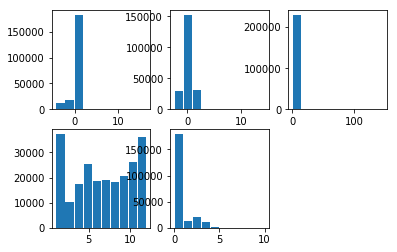

In [64]:
listfig = ['HEIGHT','WEIGHT','BUDGET','BUY_MONTH','CHILD_NUM']
plt.figure()
i = 1
for col in listfig :
    plt.subplot(2,3,i)
    plt.hist(databuy[col],rwidth = 0.9)
    i +=1
plt.show()

### 分配中可以看出存在離群值可能會影響數據 檢測離群值樣本總數

In [65]:
print('sum of outlier',sum(databuy['HEIGHT']>5),
sum(databuy['WEIGHT']>5),
sum(databuy['BUDGET']>5))

print('mean' ,databuy['HEIGHT'].mean(),databuy['WEIGHT'].mean(),databuy['BUDGET'].mean())

sum of outlier 1 6 523
mean 0.09084159766659021 0.07674179034751843 -0.06520740594595052


### 顯示出離群值樣本數極少 不影響檢測結果 將缺失值以平均或0填入

In [66]:
databuy.loc[:,['BUDGET']].fillna(value= 0,inplace=True)
Wtrain = databuy ['WEIGHT'].mean (axis = 0)
Htrain = databuy ['HEIGHT'].mean (axis = 0)
trainHW = {'HEIGHT' : Wtrain , 'WEIGHT' : Htrain}
datatbuy = databuy.fillna (value = trainHW,inplace = True)

In [81]:
databuy['CHILD_NUM'].max()

10

In [67]:
databuy.head()

,CUST_ID,BUY_TYPE,AGE,SEX,HEIGHT,WEIGHT,OCCUPATION,CHILD_NUM,BUY_MONTH,BUY_YEAR,CITY_CODE,BUDGET,MARRIAGE
0,2903965,a,d,a,0.290444,-0.069464,q37,0,9,T,m,-0.097277,b
1,2815518,a,k,a,0.076742,0.090842,i37,0,1,T,u,0.527346,b
2,526983,d,j,a,0.172307,-0.162807,i37,2,10,T,g,-0.236314,f
3,2615375,e,f,b,0.526718,0.023878,r37,0,5,T,n,-0.231325,b
4,1867789,f,h,a,-0.152571,-0.396164,r32,0,8,T,k,-0.238327,b


### 將 CUST_ID 以及類別特徵分離出來 

In [68]:
list_dummy = ['AGE','SEX','OCCUPATION','CITY_CODE','MARRIAGE','BUY_MONTH','CHILD_NUM']

In [69]:
def get_dummy(dataframe) :
    dummy = pd.get_dummies(dataframe)
    return dummy

In [70]:
AGE = get_dummy(databuy['AGE'])
SEX = get_dummy(databuy['SEX'])
OCC = get_dummy(databuy['OCCUPATION'])
CIT = get_dummy(databuy['CITY_CODE'])
MAR = get_dummy(databuy['MARRIAGE'])
MON = get_dummy(databuy['BUY_MONTH'])
CHL = get_dummy(databuy['CHILD_NUM'])

In [71]:
OCC.head()

,NANA,a37,a41,b28,c32,c37,c41,d10,d12,d14,...,r41,s32,s37,s41,t28,u37,u41,v12,v29,v41
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### 查看各個虛擬變數總量進而對columns命名，由於職業定義並未重複所以並無須重新命名

In [72]:
print(len(AGE.columns),len(SEX.columns),len(OCC.columns),len(CIT.columns),len(MAR.columns),len(MON.columns),len(CHL.columns))

17 2 100 23 6 12 11


## 唯獨月份資料用 1~12當 columns name

In [73]:
agelist = []
citlist = []
marlist = []
monlist = []
chllist = []
for i in range(len(AGE.columns)):
    agelist.append('AGE_'+ str(i))
for i in range(len(CIT.columns)):
    citlist.append('City_'+ str(i))
for i in range(len(MAR.columns)):
    marlist.append('MAR_'+ str(i))
for i in range(1,len(MON.columns)+1):
    monlist.append('MONTH_'+ str(i))
for i in range(1,len(CHL.columns)+1):
    chllist.append('CHL_'+ str(i))

In [74]:
AGE.columns = agelist
CIT.columns = citlist
MAR.columns = marlist
MON.columns = monlist
CHL.columns = chllist

In [75]:
AGE.head()

,AGE_0,AGE_1,AGE_2,AGE_3,AGE_4,AGE_5,AGE_6,AGE_7,AGE_8,AGE_9,AGE_10,AGE_11,AGE_12,AGE_13,AGE_14,AGE_15,AGE_16
0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


### 將所有資料合併

In [76]:
alldata = pd.concat([databuy,AGE,CIT,MAR,MON,CHL],axis=1)

In [77]:
alldata.head()

,CUST_ID,BUY_TYPE,AGE,SEX,HEIGHT,WEIGHT,OCCUPATION,CHILD_NUM,BUY_MONTH,BUY_YEAR,...,CHL_2,CHL_3,CHL_4,CHL_5,CHL_6,CHL_7,CHL_8,CHL_9,CHL_10,CHL_11
0,2903965,a,d,a,0.290444,-0.069464,q37,0,9,T,...,0,0,0,0,0,0,0,0,0,0
1,2815518,a,k,a,0.076742,0.090842,i37,0,1,T,...,0,0,0,0,0,0,0,0,0,0
2,526983,d,j,a,0.172307,-0.162807,i37,2,10,T,...,0,1,0,0,0,0,0,0,0,0
3,2615375,e,f,b,0.526718,0.023878,r37,0,5,T,...,0,0,0,0,0,0,0,0,0,0
4,1867789,f,h,a,-0.152571,-0.396164,r32,0,8,T,...,0,0,0,0,0,0,0,0,0,0


### drop columns

In [79]:
clearn_data = alldata.drop(['BUY_TYPE','AGE','SEX','OCCUPATION','BUY_YEAR','CITY_CODE','MARRIAGE','BUY_MONTH','CHILD_NUM'],axis=1)

In [80]:
clearn_data.to_csv('clean_data.csv')

In [82]:
clearn_data

,CUST_ID,HEIGHT,WEIGHT,BUDGET,AGE_0,AGE_1,AGE_2,AGE_3,AGE_4,AGE_5,...,CHL_2,CHL_3,CHL_4,CHL_5,CHL_6,CHL_7,CHL_8,CHL_9,CHL_10,CHL_11
0,2903965,0.290444,-0.069464,-0.097277,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2815518,0.076742,0.090842,0.527346,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,526983,0.172307,-0.162807,-0.236314,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,2615375,0.526718,0.023878,-0.231325,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1867789,-0.152571,-0.396164,-0.238327,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2356559,-0.300242,-0.769535,-0.235426,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,538256,0.076742,0.090842,-0.217920,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,626225,0.076742,0.090842,2.077900,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,874191,0.172307,-0.069464,-0.163713,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
9,936316,-2.485781,-2.123003,-0.245943,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
